<a href="https://colab.research.google.com/github/Satrio-Arif/Campus/blob/main/campus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

**Upload Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [ ]:
placement = pd.read_csv('/content/Placement_Data_Full_Class.csv')
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Exploring Data

**Cek Data Duplicated**

In [ ]:
placement[placement.duplicated(keep = False)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


**Perbandingan Jumlah Data Status**

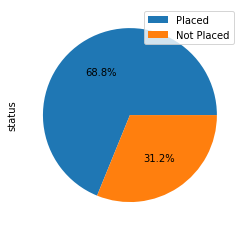

In [ ]:
placement['status'].value_counts().plot.pie(autopct = '%1.1f%%', labels = None, legend = True)

Terlihat dari pie chart diatas dataset sedikit tidak balance antara jumlah data status placed dan not placed

In [ ]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Cek Jumlah Data Kosong**

In [ ]:
placement.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

selain pada kolom salary tidak ada data kosong

# Data Cleaning

In [ ]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Menghapus Kolom sl_no, ssc_b, hsc_b, salary**

In [ ]:
placement = placement.drop(['sl_no','ssc_b','hsc_b','salary'], 1)


In [ ]:
placement

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


**Memeriksa outlier pada data numerical menggunakan boxplot**

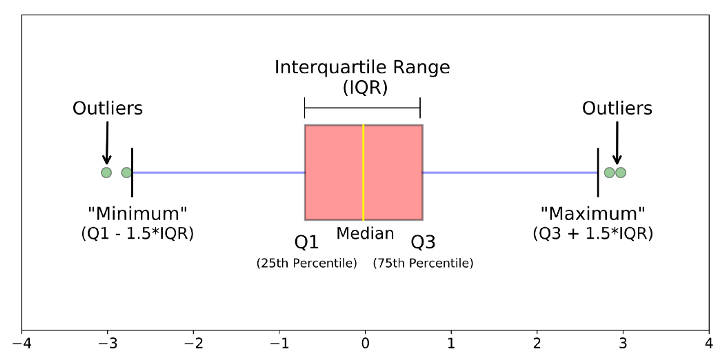

Text(0.5, 1.0, 'Presentase Nilai Sekolah Menengah Pertama')

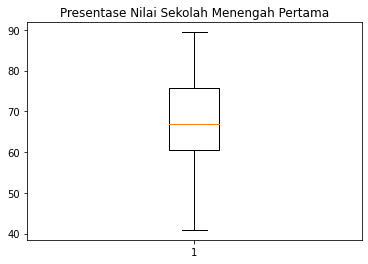

In [ ]:
plt.boxplot(placement['ssc_p'])
plt.title("Presentase Nilai Sekolah Menengah Pertama")

Text(0.5, 1.0, 'Presentase Nilai Sekolah Menengah Atas')

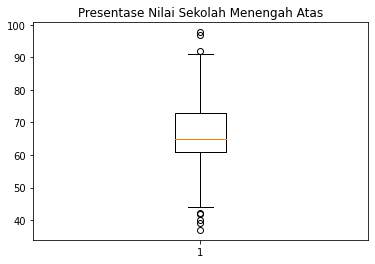

In [ ]:
plt.boxplot(placement['hsc_p'])
plt.title("Presentase Nilai Sekolah Menengah Atas")

Text(0.5, 1.0, 'Presentase Nilai Perkuliahan')

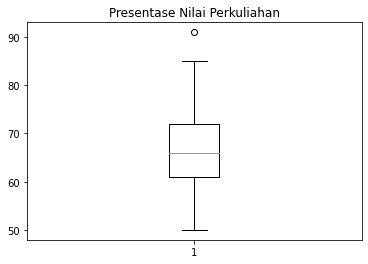

In [ ]:
plt.boxplot(placement['degree_p'])
plt.title("Presentase Nilai Perkuliahan")

Text(0.5, 1.0, 'Presentase Nilai Tes Kelayakan Kerja')

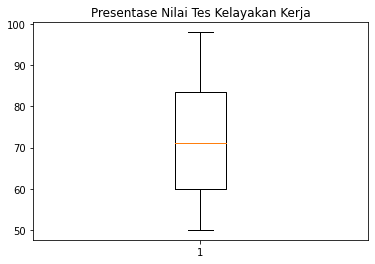

In [ ]:
plt.boxplot(placement['etest_p'])
plt.title("Presentase Nilai Tes Kelayakan Kerja")

**Menampilkan Outlier Pada Kolom hsc_p**

In [ ]:
print("Outlier Presentase Nilai Sekolah Menengah Atas")
(placement[placement['hsc_p'] > (np.percentile(placement.hsc_p,75)+((np.percentile(placement.hsc_p,75)-np.percentile(placement.hsc_p,25))*1.5))]) 


Outlier Presentase Nilai Sekolah Menengah Atas


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
24,M,76.50,97.7,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed
134,F,77.44,92.0,Commerce,72.00,Comm&Mgmt,Yes,94.0,Mkt&Fin,67.13,Placed
177,F,73.00,97.0,Commerce,79.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed


In [ ]:
placement[placement['hsc_p'] < (np.percentile(placement.hsc_p,25)-((np.percentile(placement.hsc_p,75)-np.percentile(placement.hsc_p,25))*1.5))]

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
42,M,49.00,39.00,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed
49,F,50.00,37.00,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed
120,M,58.00,40.00,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed
169,M,59.96,42.16,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed
206,M,41.00,42.00,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed


Menurut kami data tersebut bukanlah outlier 



# Exploratory Data Analysis

Kolom Specialisation

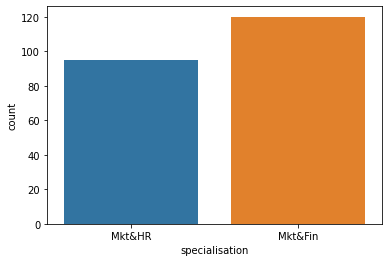

In [ ]:
sns.countplot(x="specialisation", data=placement)

Kolom Work experience

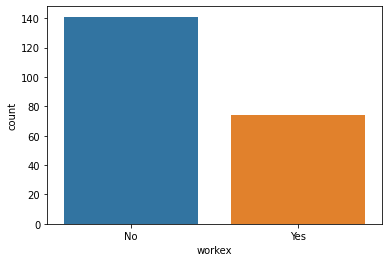

In [ ]:
sns.countplot(x="workex", data=placement)

Kolom Degree type

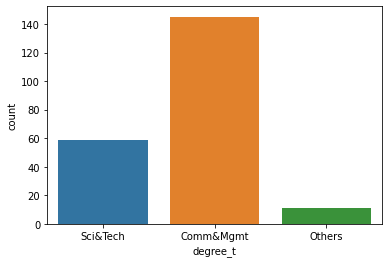

In [ ]:
sns.countplot(x="degree_t", data=placement)

Kolom Gender

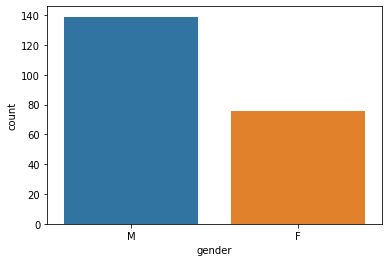

In [ ]:
sns.countplot(x="gender", data=placement)

Kolom Higher secondary specialisation

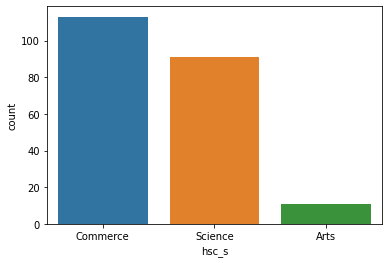

In [ ]:
sns.countplot(x="hsc_s", data=placement)

Kolom Status

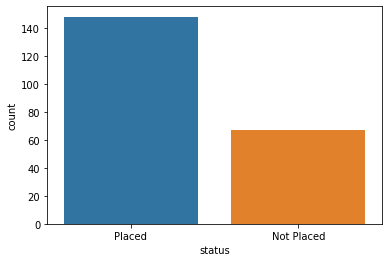

In [ ]:
ax=sns.countplot(x="status", data=placement)

**Data diatas merupakan perbandingan dari masing-masing kolom kategorikal**

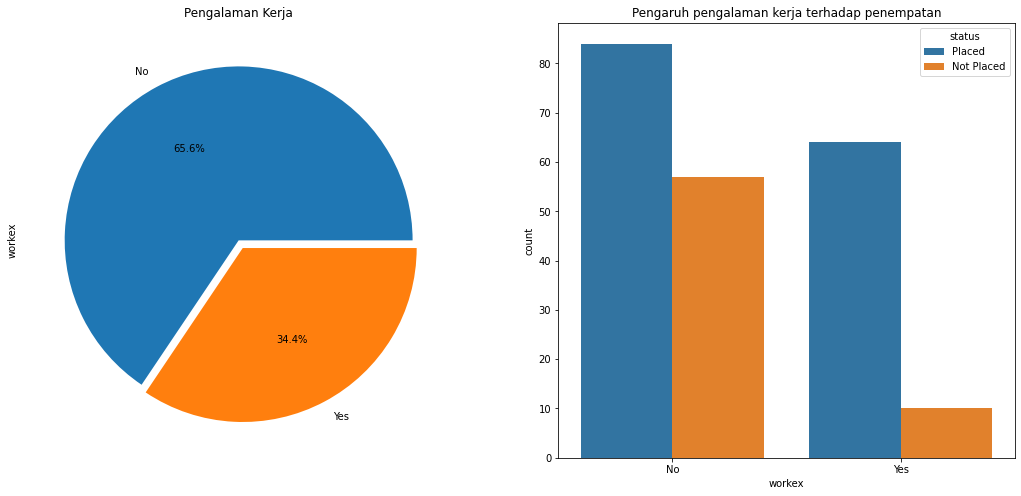

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
placement['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Pengalaman Kerja')
sns.countplot(x = 'workex',hue = "status",data = placement)
ax[1].set_title('Pengaruh pengalaman kerja terhadap penempatan')
plt.show()

**Berdasarkan tabel diatas dapat dilihat bahwa orang yang memiliki pengalaman kerja memiliki presentase kemungkinan tidak diterima lebih kecil dibandingkan orang yang tidak memiliki pengalaman kerja**

# Data Preprocessing

In [ ]:
placement

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


**Encoding Fitur Kategorikal**

In [ ]:
# Import sklearn preprocessing
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Melakukan encoding label pada kolom 'workex' , gender , specialisation , status
placement['gender']= label_encoder.fit_transform(placement['gender']) 

placement['workex']= label_encoder.fit_transform(placement['workex']) 

placement['specialisation']= label_encoder.fit_transform(placement['specialisation']) 

placement['status']= label_encoder.fit_transform(placement['status']) 


placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1


**Encoding Fitur Kategorikal dengan lebih dari 2 nilai**

In [ ]:
dummy_hsc_s=pd.get_dummies(placement['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement['degree_t'], prefix='dummy')
placement_encoded = pd.concat([placement,dummy_hsc_s,dummy_degree_t],axis=1)
placement_encoded.drop(['hsc_s','degree_t'],axis=1, inplace=True)
placement_encoded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


**Split Data Untuk Train dan Test dengan perbandingan 90:10**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (193, 14)
Input Test: (22, 14)
Output Training: (193,)
Output Test: (22,)


Akurasi pada nilai K- 1 = 72.73
Akurasi pada nilai K- 2 = 77.27
Akurasi pada nilai K- 3 = 81.82
Akurasi pada nilai K- 4 = 81.82
Akurasi pada nilai K- 5 = 90.91
Akurasi pada nilai K- 6 = 90.91
Akurasi pada nilai K- 7 = 90.91
Akurasi pada nilai K- 8 = 90.91
Akurasi pada nilai K- 9 = 90.91
Akurasi pada nilai K- 10 = 90.91
Akurasi pada nilai K- 11 = 90.91
Akurasi pada nilai K- 12 = 90.91
Akurasi pada nilai K- 13 = 90.91
Akurasi pada nilai K- 14 = 90.91
Akurasi pada nilai K- 15 = 90.91
Akurasi pada nilai K- 16 = 90.91
Akurasi pada nilai K- 17 = 90.91
Akurasi pada nilai K- 18 = 90.91
Akurasi pada nilai K- 19 = 90.91
Akurasi pada nilai K- 20 = 90.91
Akurasi pada nilai K- 21 = 90.91
Akurasi pada nilai K- 22 = 90.91
Akurasi pada nilai K- 23 = 90.91
Akurasi pada nilai K- 24 = 90.91
Akurasi pada nilai K- 25 = 90.91
Akurasi pada nilai K- 26 = 90.91
Akurasi pada nilai K- 27 = 90.91
Akurasi pada nilai K- 28 = 90.91
Akurasi pada nilai K- 29 = 90.91

 Nilai akurasi tertinggi : 90.91


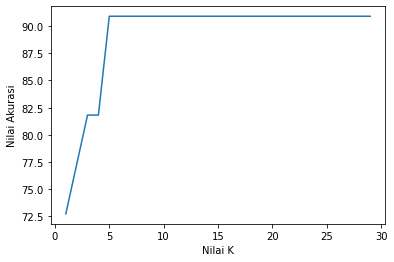

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_90_10 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 4  2]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.89      1.00      0.94        16

    accuracy                           0.91        22
   macro avg       0.94      0.83      0.87        22
weighted avg       0.92      0.91      0.90        22



**Split Data Untuk Train dan Test dengan perbandingan 85:15**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.85,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (182, 14)
Input Test: (33, 14)
Output Training: (182,)
Output Test: (33,)


Akurasi pada nilai K- 1 = 69.70
Akurasi pada nilai K- 2 = 72.73
Akurasi pada nilai K- 3 = 75.76
Akurasi pada nilai K- 4 = 72.73
Akurasi pada nilai K- 5 = 84.85
Akurasi pada nilai K- 6 = 81.82
Akurasi pada nilai K- 7 = 84.85
Akurasi pada nilai K- 8 = 84.85
Akurasi pada nilai K- 9 = 84.85
Akurasi pada nilai K- 10 = 84.85
Akurasi pada nilai K- 11 = 84.85
Akurasi pada nilai K- 12 = 84.85
Akurasi pada nilai K- 13 = 84.85
Akurasi pada nilai K- 14 = 84.85
Akurasi pada nilai K- 15 = 84.85
Akurasi pada nilai K- 16 = 84.85
Akurasi pada nilai K- 17 = 84.85
Akurasi pada nilai K- 18 = 84.85
Akurasi pada nilai K- 19 = 84.85
Akurasi pada nilai K- 20 = 84.85
Akurasi pada nilai K- 21 = 84.85
Akurasi pada nilai K- 22 = 84.85
Akurasi pada nilai K- 23 = 84.85
Akurasi pada nilai K- 24 = 84.85
Akurasi pada nilai K- 25 = 84.85
Akurasi pada nilai K- 26 = 84.85
Akurasi pada nilai K- 27 = 84.85
Akurasi pada nilai K- 28 = 84.85
Akurasi pada nilai K- 29 = 84.85

 Nilai akurasi tertinggi : 84.85


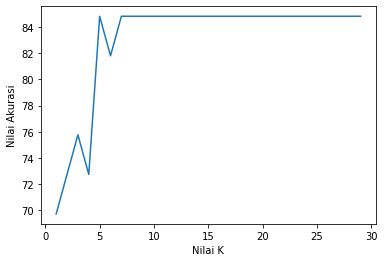

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)

score_85_15 = score_arr
print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  5]
 [ 0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.81      1.00      0.90        22

    accuracy                           0.85        33
   macro avg       0.91      0.77      0.80        33
weighted avg       0.88      0.85      0.83        33



**Split Data Untuk Train dan Test dengan perbandingan 80:20**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 14)
Input Test: (43, 14)
Output Training: (172,)
Output Test: (43,)


Akurasi pada nilai K- 1 = 69.77
Akurasi pada nilai K- 2 = 69.77
Akurasi pada nilai K- 3 = 79.07
Akurasi pada nilai K- 4 = 76.74
Akurasi pada nilai K- 5 = 81.40
Akurasi pada nilai K- 6 = 79.07
Akurasi pada nilai K- 7 = 81.40
Akurasi pada nilai K- 8 = 81.40
Akurasi pada nilai K- 9 = 81.40
Akurasi pada nilai K- 10 = 81.40
Akurasi pada nilai K- 11 = 81.40
Akurasi pada nilai K- 12 = 79.07
Akurasi pada nilai K- 13 = 81.40
Akurasi pada nilai K- 14 = 81.40
Akurasi pada nilai K- 15 = 81.40
Akurasi pada nilai K- 16 = 81.40
Akurasi pada nilai K- 17 = 81.40
Akurasi pada nilai K- 18 = 81.40
Akurasi pada nilai K- 19 = 81.40
Akurasi pada nilai K- 20 = 81.40
Akurasi pada nilai K- 21 = 81.40
Akurasi pada nilai K- 22 = 81.40
Akurasi pada nilai K- 23 = 81.40
Akurasi pada nilai K- 24 = 81.40
Akurasi pada nilai K- 25 = 81.40
Akurasi pada nilai K- 26 = 81.40
Akurasi pada nilai K- 27 = 81.40
Akurasi pada nilai K- 28 = 81.40
Akurasi pada nilai K- 29 = 81.40

 Nilai akurasi tertinggi : 81.40


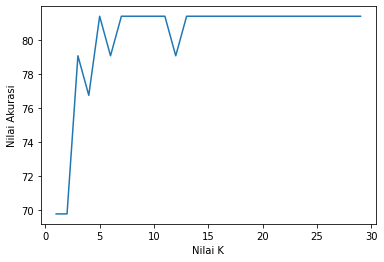

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_80_20 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 7  8]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.78      1.00      0.88        28

    accuracy                           0.81        43
   macro avg       0.89      0.73      0.76        43
weighted avg       0.86      0.81      0.79        43



**Split Data Untuk Train dan Test dengan perbandingan 75:25**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (161, 14)
Input Test: (54, 14)
Output Training: (161,)
Output Test: (54,)


Akurasi pada nilai K- 1 = 75.93
Akurasi pada nilai K- 2 = 72.22
Akurasi pada nilai K- 3 = 83.33
Akurasi pada nilai K- 4 = 77.78
Akurasi pada nilai K- 5 = 81.48
Akurasi pada nilai K- 6 = 79.63
Akurasi pada nilai K- 7 = 83.33
Akurasi pada nilai K- 8 = 79.63
Akurasi pada nilai K- 9 = 81.48
Akurasi pada nilai K- 10 = 81.48
Akurasi pada nilai K- 11 = 81.48
Akurasi pada nilai K- 12 = 81.48
Akurasi pada nilai K- 13 = 83.33
Akurasi pada nilai K- 14 = 83.33
Akurasi pada nilai K- 15 = 83.33
Akurasi pada nilai K- 16 = 83.33
Akurasi pada nilai K- 17 = 81.48
Akurasi pada nilai K- 18 = 83.33
Akurasi pada nilai K- 19 = 81.48
Akurasi pada nilai K- 20 = 81.48
Akurasi pada nilai K- 21 = 81.48
Akurasi pada nilai K- 22 = 79.63
Akurasi pada nilai K- 23 = 81.48
Akurasi pada nilai K- 24 = 79.63
Akurasi pada nilai K- 25 = 81.48
Akurasi pada nilai K- 26 = 81.48
Akurasi pada nilai K- 27 = 81.48
Akurasi pada nilai K- 28 = 79.63
Akurasi pada nilai K- 29 = 79.63

 Nilai akurasi tertinggi : 83.33


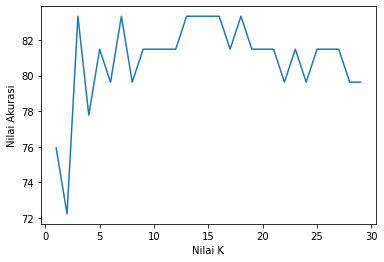

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_75_25 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  9]
 [ 0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        17
           1       0.80      1.00      0.89        37

    accuracy                           0.83        54
   macro avg       0.90      0.74      0.77        54
weighted avg       0.87      0.83      0.81        54



**Memisahkan data target dan predictor**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

**Split Data Untuk Train dan Test dengan perbandingan 70:30**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (150, 14)
Input Test: (65, 14)
Output Training: (150,)
Output Test: (65,)


Akurasi pada nilai K- 1 = 78.46
Akurasi pada nilai K- 2 = 75.38
Akurasi pada nilai K- 3 = 83.08
Akurasi pada nilai K- 4 = 83.08
Akurasi pada nilai K- 5 = 83.08
Akurasi pada nilai K- 6 = 81.54
Akurasi pada nilai K- 7 = 84.62
Akurasi pada nilai K- 8 = 84.62
Akurasi pada nilai K- 9 = 83.08
Akurasi pada nilai K- 10 = 83.08
Akurasi pada nilai K- 11 = 84.62
Akurasi pada nilai K- 12 = 84.62
Akurasi pada nilai K- 13 = 84.62
Akurasi pada nilai K- 14 = 84.62
Akurasi pada nilai K- 15 = 83.08
Akurasi pada nilai K- 16 = 83.08
Akurasi pada nilai K- 17 = 83.08
Akurasi pada nilai K- 18 = 83.08
Akurasi pada nilai K- 19 = 83.08
Akurasi pada nilai K- 20 = 81.54
Akurasi pada nilai K- 21 = 81.54
Akurasi pada nilai K- 22 = 80.00
Akurasi pada nilai K- 23 = 81.54
Akurasi pada nilai K- 24 = 81.54
Akurasi pada nilai K- 25 = 83.08
Akurasi pada nilai K- 26 = 81.54
Akurasi pada nilai K- 27 = 81.54
Akurasi pada nilai K- 28 = 80.00
Akurasi pada nilai K- 29 = 80.00

 Nilai akurasi tertinggi : 84.62


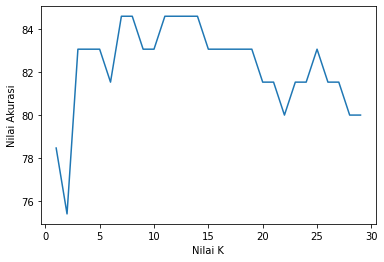

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_70_30 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  9]
 [ 1 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.55      0.69        20
           1       0.83      0.98      0.90        45

    accuracy                           0.85        65
   macro avg       0.87      0.76      0.79        65
weighted avg       0.86      0.85      0.83        65



**Split Data Untuk Train dan Test dengan perbandingan 65:35**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.65,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (139, 14)
Input Test: (76, 14)
Output Training: (139,)
Output Test: (76,)


Akurasi pada nilai K- 1 = 78.95
Akurasi pada nilai K- 2 = 76.32
Akurasi pada nilai K- 3 = 85.53
Akurasi pada nilai K- 4 = 85.53
Akurasi pada nilai K- 5 = 84.21
Akurasi pada nilai K- 6 = 85.53
Akurasi pada nilai K- 7 = 86.84
Akurasi pada nilai K- 8 = 86.84
Akurasi pada nilai K- 9 = 84.21
Akurasi pada nilai K- 10 = 85.53
Akurasi pada nilai K- 11 = 86.84
Akurasi pada nilai K- 12 = 86.84
Akurasi pada nilai K- 13 = 86.84
Akurasi pada nilai K- 14 = 86.84
Akurasi pada nilai K- 15 = 84.21
Akurasi pada nilai K- 16 = 85.53
Akurasi pada nilai K- 17 = 84.21
Akurasi pada nilai K- 18 = 82.89
Akurasi pada nilai K- 19 = 82.89
Akurasi pada nilai K- 20 = 82.89
Akurasi pada nilai K- 21 = 84.21
Akurasi pada nilai K- 22 = 84.21
Akurasi pada nilai K- 23 = 85.53
Akurasi pada nilai K- 24 = 82.89
Akurasi pada nilai K- 25 = 82.89
Akurasi pada nilai K- 26 = 82.89
Akurasi pada nilai K- 27 = 82.89
Akurasi pada nilai K- 28 = 82.89
Akurasi pada nilai K- 29 = 82.89

 Nilai akurasi tertinggi : 86.84


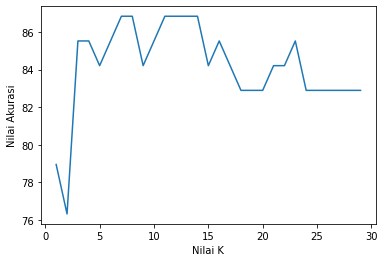

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_65_35 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11 10]
 [ 0 55]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.69        21
           1       0.85      1.00      0.92        55

    accuracy                           0.87        76
   macro avg       0.92      0.76      0.80        76
weighted avg       0.89      0.87      0.85        76



**Split Data Untuk Train dan Test dengan perbandingan 60:40**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (129, 14)
Input Test: (86, 14)
Output Training: (129,)
Output Test: (86,)


Akurasi pada nilai K- 1 = 79.07
Akurasi pada nilai K- 2 = 77.91
Akurasi pada nilai K- 3 = 84.88
Akurasi pada nilai K- 4 = 86.05
Akurasi pada nilai K- 5 = 86.05
Akurasi pada nilai K- 6 = 87.21
Akurasi pada nilai K- 7 = 86.05
Akurasi pada nilai K- 8 = 87.21
Akurasi pada nilai K- 9 = 84.88
Akurasi pada nilai K- 10 = 86.05
Akurasi pada nilai K- 11 = 84.88
Akurasi pada nilai K- 12 = 86.05
Akurasi pada nilai K- 13 = 84.88
Akurasi pada nilai K- 14 = 84.88
Akurasi pada nilai K- 15 = 83.72
Akurasi pada nilai K- 16 = 84.88
Akurasi pada nilai K- 17 = 83.72
Akurasi pada nilai K- 18 = 83.72
Akurasi pada nilai K- 19 = 82.56
Akurasi pada nilai K- 20 = 83.72
Akurasi pada nilai K- 21 = 83.72
Akurasi pada nilai K- 22 = 82.56
Akurasi pada nilai K- 23 = 83.72
Akurasi pada nilai K- 24 = 82.56
Akurasi pada nilai K- 25 = 82.56
Akurasi pada nilai K- 26 = 82.56
Akurasi pada nilai K- 27 = 82.56
Akurasi pada nilai K- 28 = 82.56
Akurasi pada nilai K- 29 = 82.56

 Nilai akurasi tertinggi : 87.21


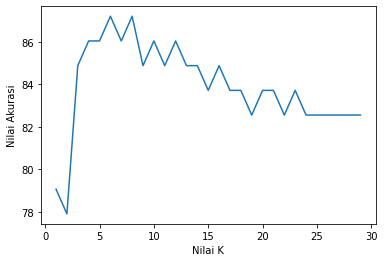

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_60_40 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[16 10]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.86      0.98      0.91        60

    accuracy                           0.87        86
   macro avg       0.90      0.80      0.83        86
weighted avg       0.88      0.87      0.86        86



**Split Data Untuk Train dan Test dengan perbandingan 55:45**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.55,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (118, 14)
Input Test: (97, 14)
Output Training: (118,)
Output Test: (97,)


Akurasi pada nilai K- 1 = 75.26
Akurasi pada nilai K- 2 = 75.26
Akurasi pada nilai K- 3 = 83.51
Akurasi pada nilai K- 4 = 84.54
Akurasi pada nilai K- 5 = 89.69
Akurasi pada nilai K- 6 = 87.63
Akurasi pada nilai K- 7 = 85.57
Akurasi pada nilai K- 8 = 86.60
Akurasi pada nilai K- 9 = 83.51
Akurasi pada nilai K- 10 = 85.57
Akurasi pada nilai K- 11 = 84.54
Akurasi pada nilai K- 12 = 83.51
Akurasi pada nilai K- 13 = 82.47
Akurasi pada nilai K- 14 = 84.54
Akurasi pada nilai K- 15 = 81.44
Akurasi pada nilai K- 16 = 84.54
Akurasi pada nilai K- 17 = 83.51
Akurasi pada nilai K- 18 = 83.51
Akurasi pada nilai K- 19 = 83.51
Akurasi pada nilai K- 20 = 82.47
Akurasi pada nilai K- 21 = 82.47
Akurasi pada nilai K- 22 = 82.47
Akurasi pada nilai K- 23 = 82.47
Akurasi pada nilai K- 24 = 82.47
Akurasi pada nilai K- 25 = 82.47
Akurasi pada nilai K- 26 = 82.47
Akurasi pada nilai K- 27 = 82.47
Akurasi pada nilai K- 28 = 82.47
Akurasi pada nilai K- 29 = 82.47

 Nilai akurasi tertinggi : 89.69


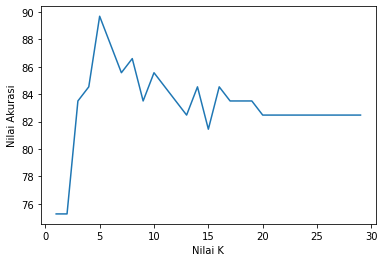

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_55_45 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[19 10]
 [ 0 68]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.87      1.00      0.93        68

    accuracy                           0.90        97
   macro avg       0.94      0.83      0.86        97
weighted avg       0.91      0.90      0.89        97



**Split Data Untuk Train dan Test dengan perbandingan 50:50**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (107, 14)
Input Test: (108, 14)
Output Training: (107,)
Output Test: (108,)


Akurasi pada nilai K- 1 = 76.85
Akurasi pada nilai K- 2 = 75.93
Akurasi pada nilai K- 3 = 82.41
Akurasi pada nilai K- 4 = 83.33
Akurasi pada nilai K- 5 = 86.11
Akurasi pada nilai K- 6 = 84.26
Akurasi pada nilai K- 7 = 84.26
Akurasi pada nilai K- 8 = 83.33
Akurasi pada nilai K- 9 = 83.33
Akurasi pada nilai K- 10 = 82.41
Akurasi pada nilai K- 11 = 82.41
Akurasi pada nilai K- 12 = 83.33
Akurasi pada nilai K- 13 = 82.41
Akurasi pada nilai K- 14 = 83.33
Akurasi pada nilai K- 15 = 82.41
Akurasi pada nilai K- 16 = 82.41
Akurasi pada nilai K- 17 = 82.41
Akurasi pada nilai K- 18 = 81.48
Akurasi pada nilai K- 19 = 82.41
Akurasi pada nilai K- 20 = 81.48
Akurasi pada nilai K- 21 = 81.48
Akurasi pada nilai K- 22 = 81.48
Akurasi pada nilai K- 23 = 81.48
Akurasi pada nilai K- 24 = 81.48
Akurasi pada nilai K- 25 = 82.41
Akurasi pada nilai K- 26 = 81.48
Akurasi pada nilai K- 27 = 81.48
Akurasi pada nilai K- 28 = 81.48
Akurasi pada nilai K- 29 = 82.41

 Nilai akurasi tertinggi : 86.11


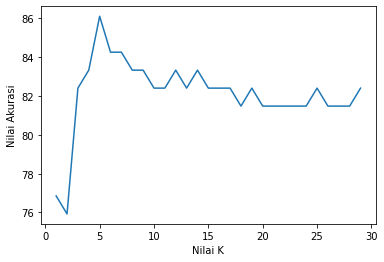

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
score_50_50 = score_arr
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[18 14]
 [ 1 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71        32
           1       0.84      0.99      0.91        76

    accuracy                           0.86       108
   macro avg       0.90      0.77      0.81       108
weighted avg       0.87      0.86      0.85       108



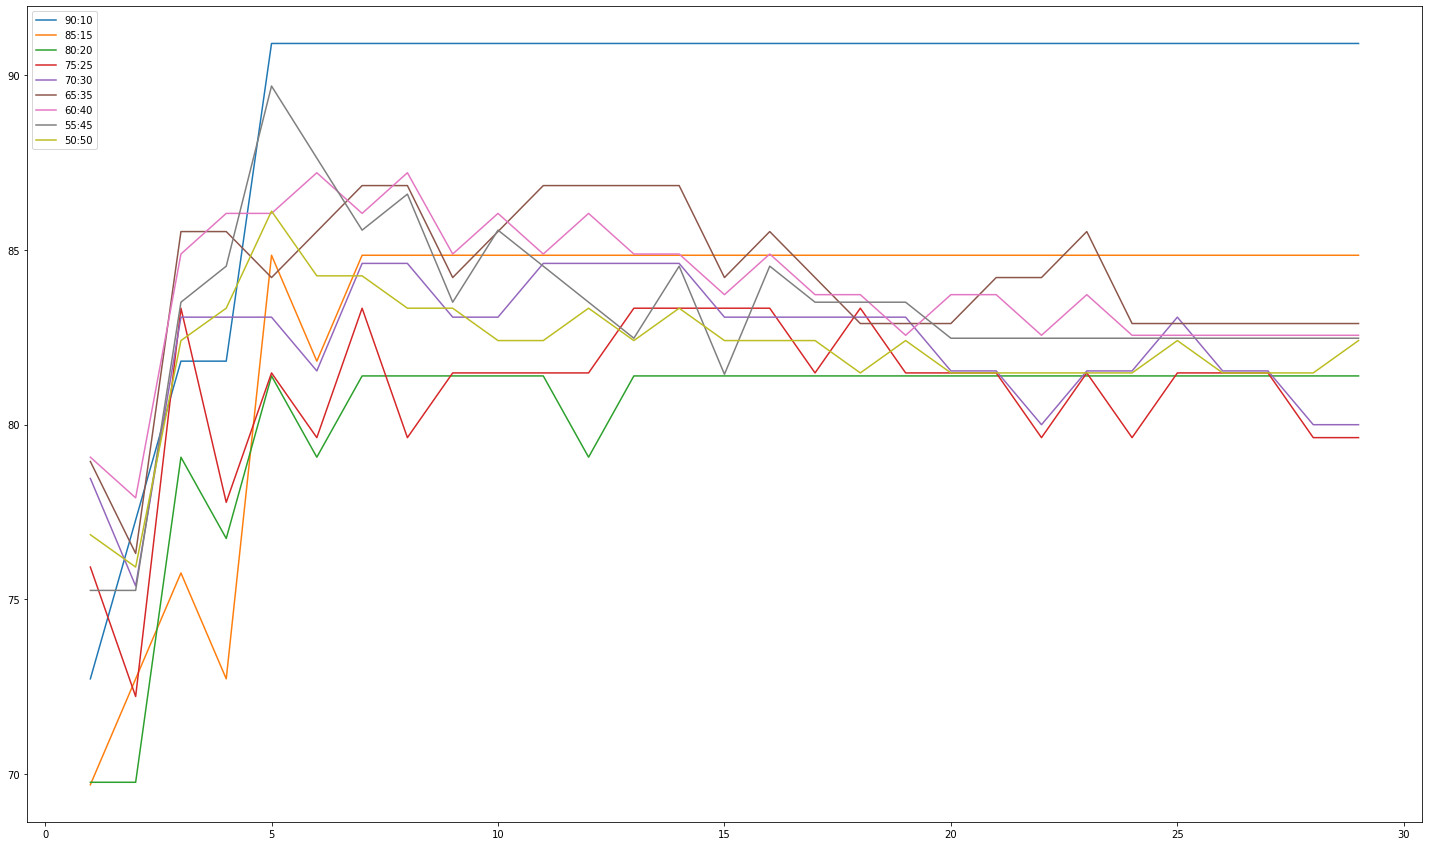

In [ ]:
plt.rcParams["figure.figsize"] = (25,15)
plt.plot(range(1,30), score_90_10, label = "90:10")
plt.plot(range(1,30), score_85_15, label = "85:15")
plt.plot(range(1,30), score_80_20, label = "80:20")
plt.plot(range(1,30), score_75_25, label = "75:25")
plt.plot(range(1,30), score_70_30, label = "70:30")
plt.plot(range(1,30), score_65_35, label = "65:35")
plt.plot(range(1,30), score_60_40, label = "60:40")
plt.plot(range(1,30), score_55_45, label = "55:45")
plt.plot(range(1,30), score_50_50, label = "50:50")
plt.legend()
plt.show()

**Melakukan modelling dengan metric Minkowski**

Akurasi pada nilai K- 1 = 78.46
Akurasi pada nilai K- 2 = 75.38
Akurasi pada nilai K- 3 = 83.08
Akurasi pada nilai K- 4 = 83.08
Akurasi pada nilai K- 5 = 83.08
Akurasi pada nilai K- 6 = 81.54
Akurasi pada nilai K- 7 = 84.62
Akurasi pada nilai K- 8 = 84.62
Akurasi pada nilai K- 9 = 83.08
Akurasi pada nilai K- 10 = 83.08
Akurasi pada nilai K- 11 = 84.62
Akurasi pada nilai K- 12 = 84.62
Akurasi pada nilai K- 13 = 84.62
Akurasi pada nilai K- 14 = 84.62
Akurasi pada nilai K- 15 = 83.08
Akurasi pada nilai K- 16 = 83.08
Akurasi pada nilai K- 17 = 83.08
Akurasi pada nilai K- 18 = 83.08
Akurasi pada nilai K- 19 = 83.08
Akurasi pada nilai K- 20 = 81.54
Akurasi pada nilai K- 21 = 81.54
Akurasi pada nilai K- 22 = 80.00
Akurasi pada nilai K- 23 = 81.54
Akurasi pada nilai K- 24 = 81.54
Akurasi pada nilai K- 25 = 83.08
Akurasi pada nilai K- 26 = 81.54
Akurasi pada nilai K- 27 = 81.54
Akurasi pada nilai K- 28 = 80.00
Akurasi pada nilai K- 29 = 80.00

 Nilai akurasi tertinggi : 84.62


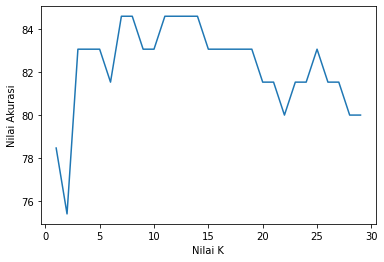

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  9]
 [ 1 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.55      0.69        20
           1       0.83      0.98      0.90        45

    accuracy                           0.85        65
   macro avg       0.87      0.76      0.79        65
weighted avg       0.86      0.85      0.83        65



**Melakukan modelling dengan metric Manhattan**

Akurasi pada nilai K- 1 = 75.38
Akurasi pada nilai K- 2 = 78.46
Akurasi pada nilai K- 3 = 86.15
Akurasi pada nilai K- 4 = 84.62
Akurasi pada nilai K- 5 = 87.69
Akurasi pada nilai K- 6 = 84.62
Akurasi pada nilai K- 7 = 83.08
Akurasi pada nilai K- 8 = 84.62
Akurasi pada nilai K- 9 = 81.54
Akurasi pada nilai K- 10 = 81.54
Akurasi pada nilai K- 11 = 81.54
Akurasi pada nilai K- 12 = 84.62
Akurasi pada nilai K- 13 = 84.62
Akurasi pada nilai K- 14 = 86.15
Akurasi pada nilai K- 15 = 83.08
Akurasi pada nilai K- 16 = 83.08
Akurasi pada nilai K- 17 = 83.08
Akurasi pada nilai K- 18 = 84.62
Akurasi pada nilai K- 19 = 83.08
Akurasi pada nilai K- 20 = 83.08
Akurasi pada nilai K- 21 = 83.08
Akurasi pada nilai K- 22 = 81.54
Akurasi pada nilai K- 23 = 81.54
Akurasi pada nilai K- 24 = 81.54
Akurasi pada nilai K- 25 = 81.54
Akurasi pada nilai K- 26 = 81.54
Akurasi pada nilai K- 27 = 80.00
Akurasi pada nilai K- 28 = 81.54
Akurasi pada nilai K- 29 = 81.54

 Nilai akurasi tertinggi : 87.69


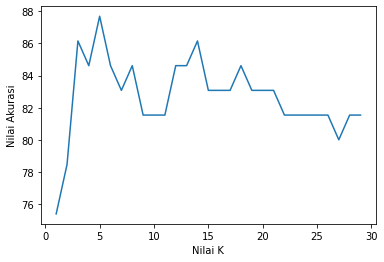

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[12  8]
 [ 0 45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.85      1.00      0.92        45

    accuracy                           0.88        65
   macro avg       0.92      0.80      0.83        65
weighted avg       0.90      0.88      0.87        65



**Percobaan dengan membuat model hanya berdasar fitur dengan data kontinyu**

In [ ]:
placement_encoded

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [ ]:
placement

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1
211,1,58.00,60.00,Science,72.00,Sci&Tech,0,74.0,0,53.62,1
212,1,67.00,67.00,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1
213,0,74.00,66.00,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,1


In [ ]:
placement = placement.drop(['gender','hsc_s','degree_t','specialisation','mba_p'], 1)


In [ ]:
placement

,ssc_p,hsc_p,degree_p,workex,etest_p,status
0,67.00,91.00,58.00,0,55.0,1
1,79.33,78.33,77.48,1,86.5,1
2,65.00,68.00,64.00,0,75.0,1
3,56.00,52.00,52.00,0,66.0,0
4,85.80,73.60,73.30,0,96.8,1
...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,1
211,58.00,60.00,72.00,0,74.0,1
212,67.00,67.00,73.00,1,59.0,1
213,74.00,66.00,58.00,0,70.0,1


In [ ]:
X=placement.drop(['status'],axis=1)
y=placement.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (150, 5)
Input Test: (65, 5)
Output Training: (150,)
Output Test: (65,)


Akurasi pada nilai K- 1 = 73.85
Akurasi pada nilai K- 2 = 67.69
Akurasi pada nilai K- 3 = 76.92
Akurasi pada nilai K- 4 = 78.46
Akurasi pada nilai K- 5 = 81.54
Akurasi pada nilai K- 6 = 80.00
Akurasi pada nilai K- 7 = 81.54
Akurasi pada nilai K- 8 = 76.92
Akurasi pada nilai K- 9 = 81.54
Akurasi pada nilai K- 10 = 83.08
Akurasi pada nilai K- 11 = 83.08
Akurasi pada nilai K- 12 = 81.54
Akurasi pada nilai K- 13 = 81.54
Akurasi pada nilai K- 14 = 80.00
Akurasi pada nilai K- 15 = 80.00
Akurasi pada nilai K- 16 = 80.00
Akurasi pada nilai K- 17 = 81.54
Akurasi pada nilai K- 18 = 81.54
Akurasi pada nilai K- 19 = 81.54
Akurasi pada nilai K- 20 = 80.00
Akurasi pada nilai K- 21 = 81.54
Akurasi pada nilai K- 22 = 80.00
Akurasi pada nilai K- 23 = 81.54
Akurasi pada nilai K- 24 = 80.00
Akurasi pada nilai K- 25 = 80.00
Akurasi pada nilai K- 26 = 80.00
Akurasi pada nilai K- 27 = 80.00
Akurasi pada nilai K- 28 = 80.00
Akurasi pada nilai K- 29 = 80.00

 Nilai akurasi tertinggi : 83.08


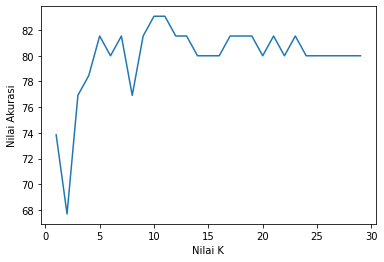

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)

print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  9]
 [ 2 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.83      0.96      0.89        45

    accuracy                           0.83        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.83      0.83      0.82        65



**Mencoba menghapus outlier**

In [ ]:
placement_encoded

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [ ]:
Q1 = placement_encoded['hsc_p'].quantile(0.25)
Q3 = placement_encoded['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    

filter =  (placement_encoded['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_encoded.loc[filter]

In [ ]:
placement_filtered

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [ ]:
X=placement_filtered.drop(['status'],axis=1)
y=placement_filtered.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (148, 14)
Input Test: (64, 14)
Output Training: (148,)
Output Test: (64,)


Akurasi pada nilai K- 1 = 78.12
Akurasi pada nilai K- 2 = 71.88
Akurasi pada nilai K- 3 = 78.12
Akurasi pada nilai K- 4 = 78.12
Akurasi pada nilai K- 5 = 81.25
Akurasi pada nilai K- 6 = 79.69
Akurasi pada nilai K- 7 = 81.25
Akurasi pada nilai K- 8 = 81.25
Akurasi pada nilai K- 9 = 82.81
Akurasi pada nilai K- 10 = 84.38
Akurasi pada nilai K- 11 = 82.81
Akurasi pada nilai K- 12 = 81.25
Akurasi pada nilai K- 13 = 81.25
Akurasi pada nilai K- 14 = 81.25
Akurasi pada nilai K- 15 = 78.12
Akurasi pada nilai K- 16 = 78.12
Akurasi pada nilai K- 17 = 79.69
Akurasi pada nilai K- 18 = 79.69
Akurasi pada nilai K- 19 = 79.69
Akurasi pada nilai K- 20 = 79.69
Akurasi pada nilai K- 21 = 79.69
Akurasi pada nilai K- 22 = 79.69
Akurasi pada nilai K- 23 = 79.69
Akurasi pada nilai K- 24 = 81.25
Akurasi pada nilai K- 25 = 81.25
Akurasi pada nilai K- 26 = 79.69
Akurasi pada nilai K- 27 = 79.69
Akurasi pada nilai K- 28 = 78.12
Akurasi pada nilai K- 29 = 78.12

 Nilai akurasi tertinggi : 84.38


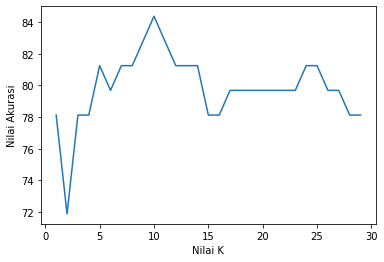

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[14  8]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74        22
           1       0.83      0.95      0.89        42

    accuracy                           0.84        64
   macro avg       0.85      0.79      0.81        64
weighted avg       0.85      0.84      0.84        64



**Melakukan resampling dataset**

In [ ]:
X=placement_encoded.drop(['status'],axis=1)
y=placement_encoded.status

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Perhitungan distribusi class sebelum resampling 
print(Counter(y))

Counter({1: 148, 0: 67})


In [ ]:
# Strategi resampling yang digunakan
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# Melakukan undersample pada dataset
X_over, y_over = undersample.fit_resample(X, y)

In [ ]:
# Perhitungan distribusi class setelah resampling
print(Counter(y_over))

Counter({0: 67, 1: 67})


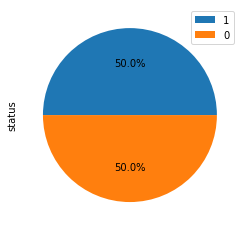

In [ ]:
y_over_df = y_over.to_frame()
y_over_df['status'].value_counts().plot.pie(autopct = '%1.1f%%', labels = None, legend = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.7,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (93, 14)
Input Test: (41, 14)
Output Training: (93,)
Output Test: (41,)


Akurasi pada nilai K- 1 = 73.17
Akurasi pada nilai K- 2 = 78.05
Akurasi pada nilai K- 3 = 85.37
Akurasi pada nilai K- 4 = 82.93
Akurasi pada nilai K- 5 = 85.37
Akurasi pada nilai K- 6 = 82.93
Akurasi pada nilai K- 7 = 92.68
Akurasi pada nilai K- 8 = 82.93
Akurasi pada nilai K- 9 = 85.37
Akurasi pada nilai K- 10 = 85.37
Akurasi pada nilai K- 11 = 85.37
Akurasi pada nilai K- 12 = 80.49
Akurasi pada nilai K- 13 = 87.80
Akurasi pada nilai K- 14 = 82.93
Akurasi pada nilai K- 15 = 85.37
Akurasi pada nilai K- 16 = 90.24
Akurasi pada nilai K- 17 = 87.80
Akurasi pada nilai K- 18 = 82.93
Akurasi pada nilai K- 19 = 87.80
Akurasi pada nilai K- 20 = 87.80
Akurasi pada nilai K- 21 = 87.80
Akurasi pada nilai K- 22 = 87.80
Akurasi pada nilai K- 23 = 87.80
Akurasi pada nilai K- 24 = 92.68
Akurasi pada nilai K- 25 = 87.80
Akurasi pada nilai K- 26 = 87.80
Akurasi pada nilai K- 27 = 87.80
Akurasi pada nilai K- 28 = 85.37
Akurasi pada nilai K- 29 = 85.37

 Nilai akurasi tertinggi : 92.68


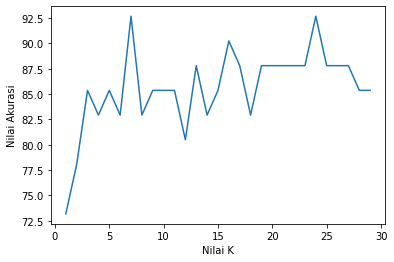

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[22  2]
 [ 1 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.89      0.94      0.91        17

    accuracy                           0.93        41
   macro avg       0.92      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



**Prediksi dengan matric manhattan**

Akurasi pada nilai K- 1 = 68.29
Akurasi pada nilai K- 2 = 75.61
Akurasi pada nilai K- 3 = 87.80
Akurasi pada nilai K- 4 = 82.93
Akurasi pada nilai K- 5 = 82.93
Akurasi pada nilai K- 6 = 85.37
Akurasi pada nilai K- 7 = 85.37
Akurasi pada nilai K- 8 = 87.80
Akurasi pada nilai K- 9 = 82.93
Akurasi pada nilai K- 10 = 80.49
Akurasi pada nilai K- 11 = 87.80
Akurasi pada nilai K- 12 = 85.37
Akurasi pada nilai K- 13 = 85.37
Akurasi pada nilai K- 14 = 82.93
Akurasi pada nilai K- 15 = 87.80
Akurasi pada nilai K- 16 = 87.80
Akurasi pada nilai K- 17 = 90.24
Akurasi pada nilai K- 18 = 85.37
Akurasi pada nilai K- 19 = 85.37
Akurasi pada nilai K- 20 = 82.93
Akurasi pada nilai K- 21 = 82.93
Akurasi pada nilai K- 22 = 90.24
Akurasi pada nilai K- 23 = 85.37
Akurasi pada nilai K- 24 = 87.80
Akurasi pada nilai K- 25 = 85.37
Akurasi pada nilai K- 26 = 82.93
Akurasi pada nilai K- 27 = 87.80
Akurasi pada nilai K- 28 = 85.37
Akurasi pada nilai K- 29 = 87.80

 Nilai akurasi tertinggi : 90.24


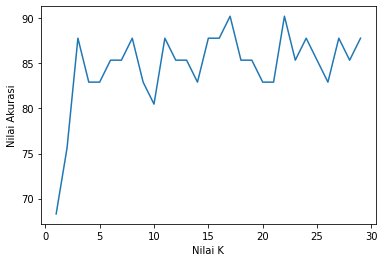

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

Akurasi pada nilai K- 1 = 73.17
Akurasi pada nilai K- 2 = 78.05
Akurasi pada nilai K- 3 = 85.37
Akurasi pada nilai K- 4 = 82.93
Akurasi pada nilai K- 5 = 85.37
Akurasi pada nilai K- 6 = 82.93
Akurasi pada nilai K- 7 = 92.68
Akurasi pada nilai K- 8 = 82.93
Akurasi pada nilai K- 9 = 85.37
Akurasi pada nilai K- 10 = 85.37
Akurasi pada nilai K- 11 = 85.37
Akurasi pada nilai K- 12 = 80.49
Akurasi pada nilai K- 13 = 87.80
Akurasi pada nilai K- 14 = 82.93
Akurasi pada nilai K- 15 = 85.37
Akurasi pada nilai K- 16 = 90.24
Akurasi pada nilai K- 17 = 87.80
Akurasi pada nilai K- 18 = 82.93
Akurasi pada nilai K- 19 = 87.80
Akurasi pada nilai K- 20 = 87.80
Akurasi pada nilai K- 21 = 87.80
Akurasi pada nilai K- 22 = 87.80
Akurasi pada nilai K- 23 = 87.80
Akurasi pada nilai K- 24 = 92.68
Akurasi pada nilai K- 25 = 87.80
Akurasi pada nilai K- 26 = 87.80
Akurasi pada nilai K- 27 = 87.80
Akurasi pada nilai K- 28 = 85.37
Akurasi pada nilai K- 29 = 85.37

 Nilai akurasi tertinggi : 92.68


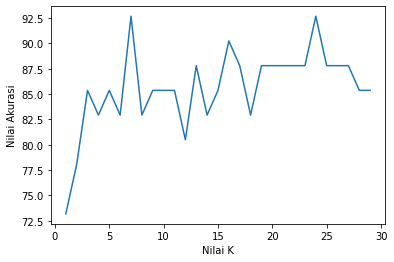

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_arr = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    score = knn.score(X_test,y_test) * 100
    print("Akurasi pada nilai K-", i , "=", "{:.2f}".format(score))
    score_arr.append(score)


print("\n Nilai akurasi tertinggi :","{:.2f}".format(max(score_arr)))
plt.plot(range(1,30), score_arr)
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

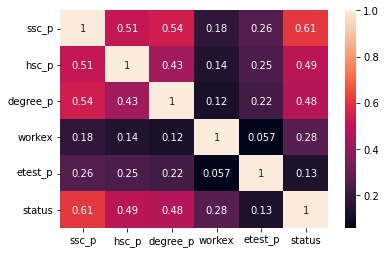

In [ ]:
sns.heatmap(placement.corr(),annot=True)

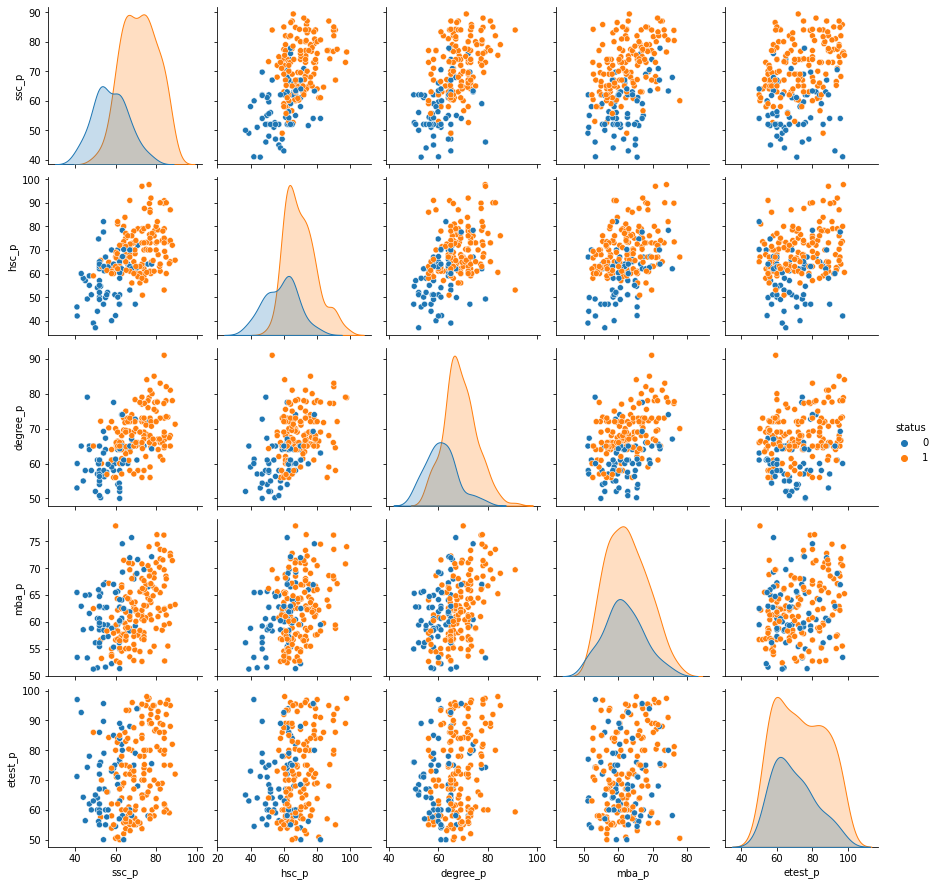

In [ ]:
sns.pairplot(placement_encoded,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")